In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.shape

(6019, 14)

In [4]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,4.78 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


# Data Cleaning

In [6]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [9]:
def mileage_convert(x):
    if type(x) == str:
        if x.split()[-1] == 'km/kg':
            return float(x.split()[0])*1.40
        elif x.split()[-1] == 'kmpl':
            return float(x.split()[0])
    else:
        return x
    
df['Mileage(km/l)'] = df['Mileage'].apply(mileage_convert)

df['Mileage(km/l)'] = df['Mileage(km/l)'].replace(np.nan,df['Mileage(km/l)'].mean()).astype(np.float)

In [10]:
df['Engine(cc)'] = df['Engine'].astype(str).map(lambda x : x.split(' ')[0]).astype(np.float)
df['Engine(cc)']=df['Engine(cc)'].replace(np.nan,df['Engine(cc)'].mean())

In [11]:
df['Seats'] = df['Seats'].astype(np.float).replace(np.nan,df['Seats'].mean())

In [12]:
df['Power(bph)'] = df['Power'].astype(str).map(lambda x : x.split(' ')[0])
df['Power(bph)'] = pd.to_numeric(df['Power(bph)'],errors='coerce')
df['Power(bph)'] = df['Power(bph)'].astype(np.float).replace(np.nan,df['Power(bph)'].mean())

In [13]:
df['Brand'] = df['Name'].map(lambda x: x.split()[0])
df['Model'] = df['Name'].map(lambda x: x.split()[1])

In [14]:
df.drop(['New_Price','Unnamed: 0','Mileage','Engine','Power','Name'],inplace=True,axis=1)

In [15]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/l),Engine(cc),Power(bph),Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,37.24,998.0,58.16,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,Audi,A4


In [16]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Mileage(km/l)        0
Engine(cc)           0
Power(bph)           0
Brand                0
Model                0
dtype: int64

In [17]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Mileage(km/l)', 'Engine(cc)',
       'Power(bph)', 'Brand', 'Model'],
      dtype='object')

In [18]:
data = pd.DataFrame(df,columns=['Brand','Model','Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats','Mileage(km/l)', 'Engine(cc)',
       'Power(bph)','Price' ])
data.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/l),Engine(cc),Power(bph),Price
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,5.0,37.24,998.0,58.16,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,17.74


# Data visulization

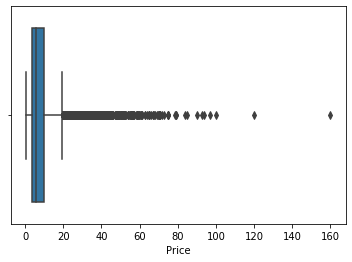

In [19]:
sns.boxplot(data['Price']) # this shows that price has some outliers which can be neglected

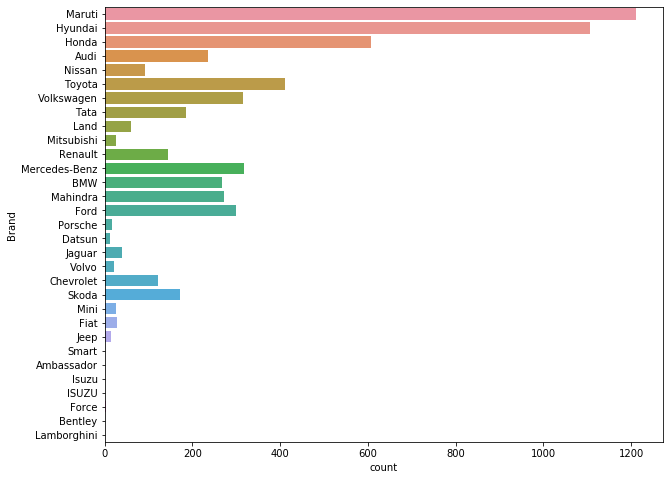

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(y=data['Brand'])

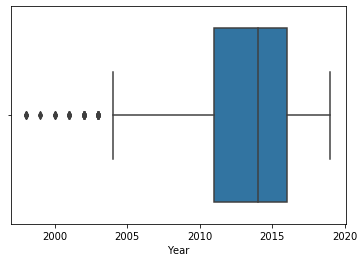

In [21]:
sns.boxplot(data['Year'])

In [22]:
data['Year'].nunique()

22

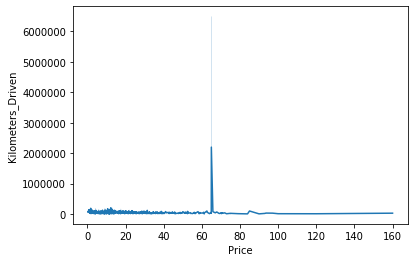

In [23]:
sns.lineplot(data['Price'],data['Kilometers_Driven'])

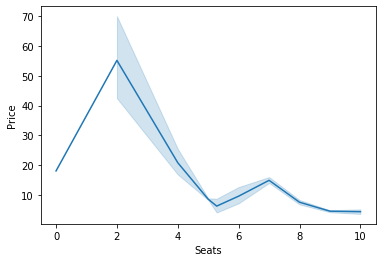

In [24]:
sns.lineplot(y=data['Price'],x=data['Seats'])# this plot shows that when seats increase first price increase then it is decreasing

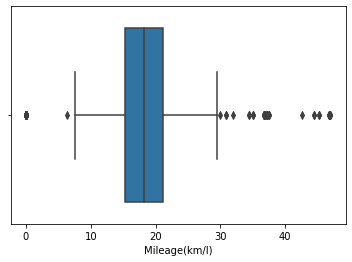

In [25]:
sns.boxplot(data['Mileage(km/l)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


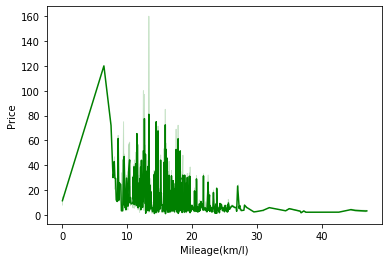

In [26]:
sns.lineplot(y=data['Price'],x=data['Mileage(km/l)'],c='g') #This shows that when mileage increase price also increases but their are outliers in mileage.

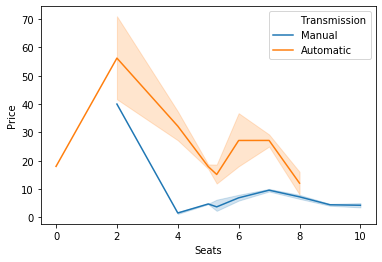

In [27]:
sns.lineplot(y=data['Price'],x=data['Seats'],hue=data['Transmission'])

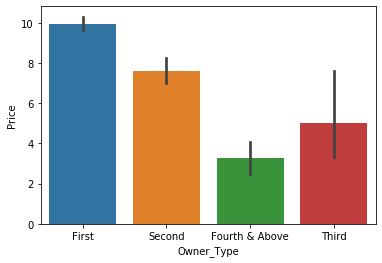

In [28]:
sns.barplot(y=data['Price'],x=data['Owner_Type'])

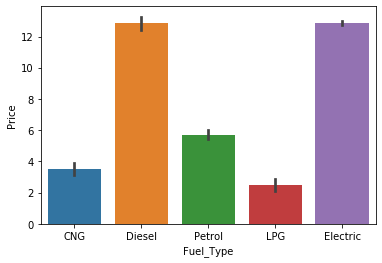

In [29]:
sns.barplot(y=data['Price'],x=data['Fuel_Type'],)

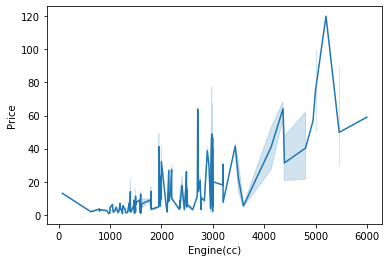

In [30]:
sns.lineplot(data['Engine(cc)'],data['Price'])

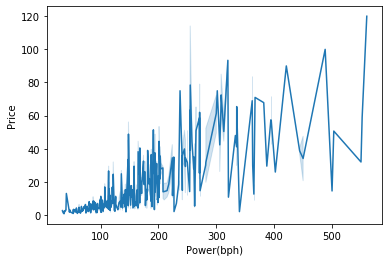

In [31]:
sns.lineplot(data['Power(bph)'],data['Price'])

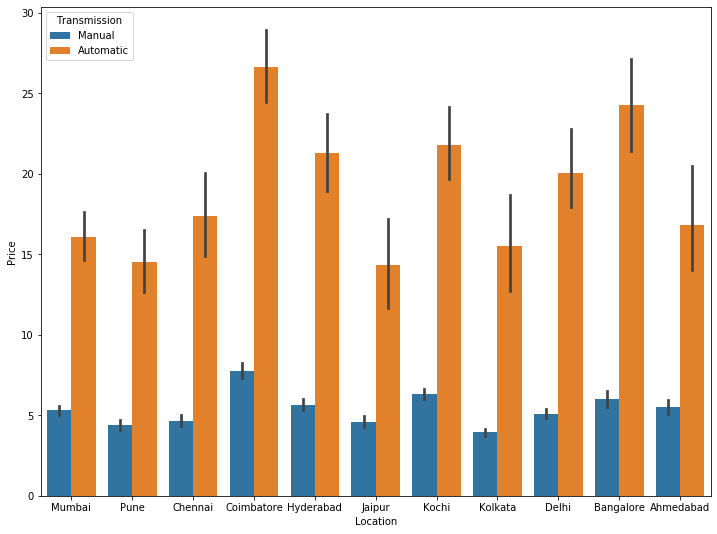

In [32]:
plt.figure(figsize=(12,9))
sns.barplot(y=data['Price'],x=data['Location'],hue=data['Transmission'])

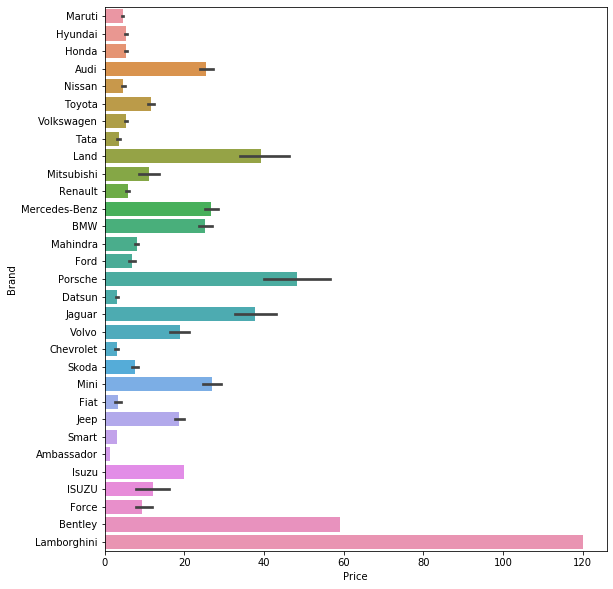

In [34]:
plt.figure(figsize=(9,10))
sns.barplot(y=data['Brand'],x=data['Price'])